In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [92]:
data = pd.read_csv('data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [93]:
X = data.iloc[:,2:4]
y = data.iloc[:,-1]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [95]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [96]:
k = int(np.floor(np.sqrt(X_train.shape[0])))
k

17

In [120]:
clfr = KNeighborsClassifier(n_neighbors=k)
clf2 = DecisionTreeClassifier()
clfr.fit(X_train, y_train)
clf2.fit(X_train, y_train)
y_preds = clfr.predict(X_test)
y_preds2 = clf2.predict(X_test)

In [121]:
print('------------Classficiation report for KNN-----------')
print(classification_report(y_test, y_preds))
print('------------Classficiation report for DT-----------')
print(classification_report(y_test, y_preds2))

------------Classficiation report for KNN-----------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.96      0.81      0.88        32

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.92      0.91      0.91        80

------------Classficiation report for DT-----------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.86      0.75      0.80        32

    accuracy                           0.85        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.85      0.85      0.85        80



In [99]:
def clf(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)
acc= clf(5)
acc

0.8875

In [100]:
res=[]

for i in range(1,26):
    acc = clf(i)
    res.append(acc)
res

[0.8875,
 0.8625,
 0.925,
 0.8625,
 0.8875,
 0.875,
 0.9,
 0.875,
 0.9125,
 0.8875,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.9375,
 0.9125,
 0.9125,
 0.9,
 0.9125]

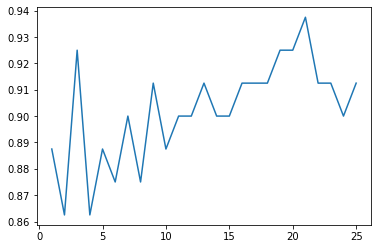

In [101]:
plt.plot(range(1,26),res)

In [102]:
clfa = KNeighborsClassifier(n_neighbors=21)
clfa.fit(X_train, y_train)
y_preds_a = clfa.predict(X_test)


In [103]:
print('------------Classficiation report for KNN-----------')
print(classification_report(y_test, y_preds_a))

------------Classficiation report for KNN-----------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.97      0.88      0.92        32

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [104]:
def predict_output(age, salary):
    test = np.array([[age],[salary]]).reshape(1,2)
    y_pred = clfa.predict(test)
    print(y_pred)

In [105]:
predict_output(20,20000)

[1]


In [106]:
clfa= KNeighborsClassifier(n_jobs=-1)
clfa.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [107]:
params ={ 
    'p' : [1,2,3,4,5],
    'n_neighbors': [1,5,9,13,17,21,25],
 'weights': ['uniform','distance']}

In [108]:
knn_gcv = GridSearchCV(estimator= clfa, param_grid=params, cv=10, verbose=2)
knn_gcv.fit(X_train,y_train)
y_preds_kcv = knn_gcv.predict(X_test)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   2.5s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, we

[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_ne

[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=17, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=21, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=21, p=3, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=21, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ..............n_nei

In [109]:
print('------------Classficiation report for KNN-----------')
print(classification_report(y_test, y_preds_kcv))

------------Classficiation report for KNN-----------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        48
           1       0.93      0.78      0.85        32

    accuracy                           0.89        80
   macro avg       0.90      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



In [110]:
x = np.arange(start = X_train[:,0].min()-1 , stop = X_train[:,0].max()+1, step=0.01)
y = np.arange(start = X_train[:,1].min()-1 , stop = X_train[:,1].max()+1, step=0.01)

In [111]:
x.shape,y.shape

((606,), (599,))

In [112]:
XX, yy = np.meshgrid(x,y)

In [113]:
XX.shape, yy.shape

((599, 606), (599, 606))

In [114]:
finarr = np.array([XX.ravel(),yy.ravel()]).T

In [115]:
finarr.shape

(362994, 2)

In [122]:
result_arr = clfr.predict(finarr)

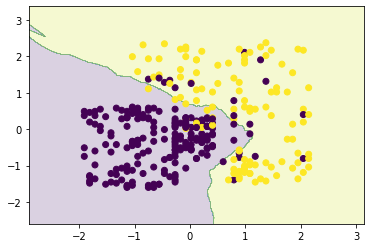

In [127]:
plt.contourf(XX,yy,result_arr.reshape(XX.shape),alpha =0.2)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)